In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

Construcción de la interpolación de Lagrange para un conjunto de soporte, este será desarrollado de forma símbolica y númerica

In [2]:
x0,x1,x2=sym.symbols("x0 x1 x2")
y0,y1,y2=sym.symbols("y0 y1 y2")
x = sym.symbols('x')
X = sym.symbols('X:3')  
Y = sym.symbols('Y:3')  

In [3]:
def Lagrange(x, X, i):
    L = 1
    for j in range(len(X)):
        if i != j:
            L *= (x - X[j]) / (X[i] - X[j])
    return L

def Interpolate(x, X, Y):
    Poly = 0
    for i in range(len(X)):
        Poly += Y[i] * Lagrange(x, X, i)
    return Poly

In [4]:
X = sym.Matrix([x0,x1,x2])
Y = sym.Matrix([y0,y1,y2])

poly = Interpolate(x, X, Y)
poly

y0*(x - x1)*(x - x2)/((x0 - x1)*(x0 - x2)) + y1*(x - x0)*(x - x2)/((-x0 + x1)*(x1 - x2)) + y2*(x - x0)*(x - x1)/((-x0 + x2)*(-x1 + x2))

In [5]:
Derivada=sym.diff(poly,x,0)
Derivada

y0*(x - x1)*(x - x2)/((x0 - x1)*(x0 - x2)) + y1*(x - x0)*(x - x2)/((-x0 + x1)*(x1 - x2)) + y2*(x - x0)*(x - x1)/((-x0 + x2)*(-x1 + x2))

Ahora implementación de la misma función, pero esta vez con números

In [6]:
x_v = np.array([-3,-2,-1])
y= np.array([1,-1,4])

In [7]:
poly = Interpolate(x, x_v, y)
poly

(-x - 2)*(-x/2 - 1/2) - (-x - 1)*(x + 3) + 4*(x/2 + 3/2)*(x + 2)

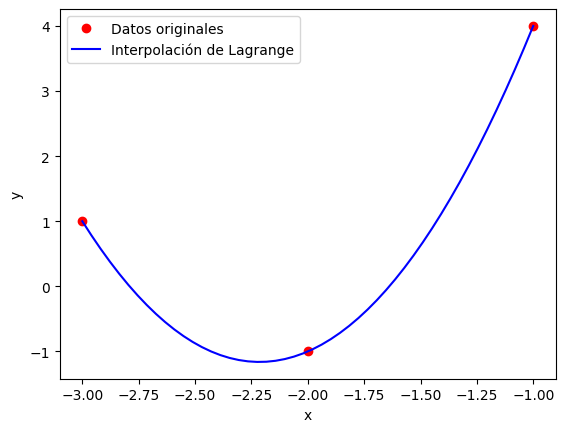

In [8]:
funcion = sym.lambdify(x, poly, 'numpy')

xplt = np.linspace(x_v[0], x_v[-1])
yplt = funcion(xplt)  

plt.plot(x_v, y, "ro", label="Datos originales")
plt.plot(xplt, yplt, "b-", label="Interpolación de Lagrange")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [9]:
Derivada=sym.diff(poly,x)
Derivada

7*x + 31/2

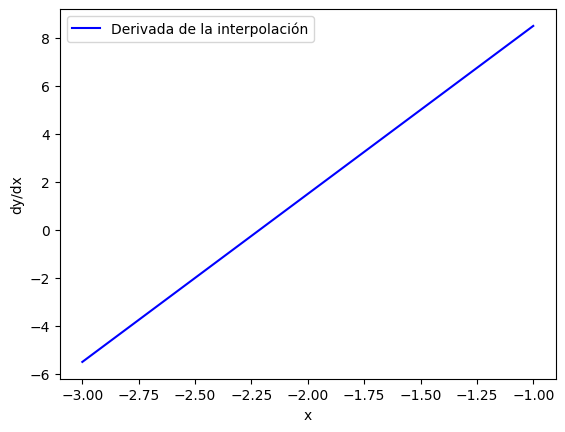

In [10]:
deri = sym.lambdify(x, Derivada, 'numpy')

xplt = np.linspace(x_v[0], x_v[-1])
yplt = deri(xplt)  

plt.plot(xplt, yplt, "b-", label="Derivada de la interpolación")
plt.xlabel("x")
plt.ylabel("dy/dx")
plt.legend()
plt.show()

c) Estimar la derivada progresiva para: 

In [11]:
expr = sym.sqrt(sym.tan(x))
expr

sqrt(tan(x))

En el intervalo [0.1, 1.1] con h = 0.01

In [12]:
x_tan=np.arange(0.1,1.11,0.01)
def tangente(x_tan):
    return (np.tan(x_tan))**(1/2)

y=tangente(x_tan)

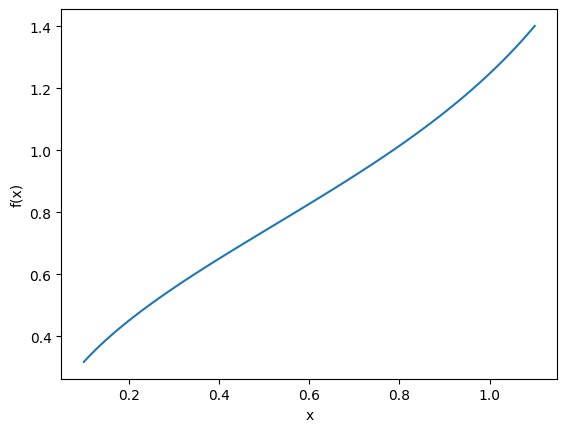

In [13]:
plt.plot(x_tan,y)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [14]:
derivada_tan=sym.diff(expr)
derivada_numerica = sym.lambdify(x, derivada_tan, 'numpy')
derivada_tan

(tan(x)**2/2 + 1/2)/sqrt(tan(x))

Derivada progresiva, central y exacta

In [15]:
f = tangente(x_tan) 
h = 0.01

derivada_progresiva = (-3*f[:-2] + 4*f[1:-1] - f[2:]) / (2*h)
derivada_exacta = derivada_numerica(x_tan[1:-1])

In [16]:
derivada_centrada = (f[2:] - f[:-2]) / (2 * h)

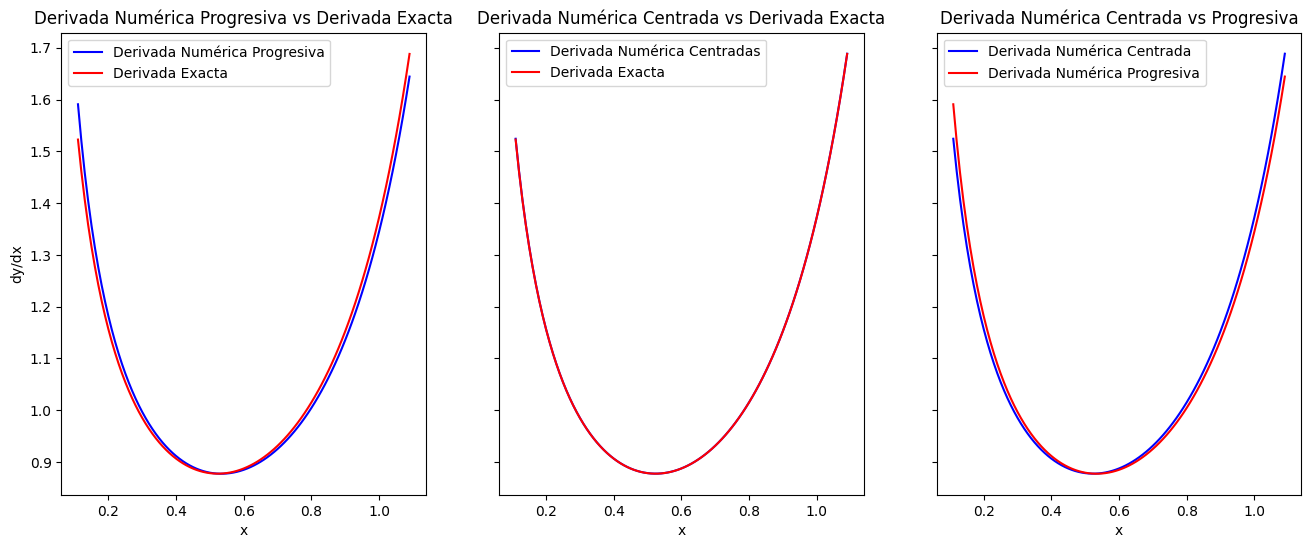

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharey=True)

axs[0].plot(x_tan[1:-1], derivada_progresiva, label='Derivada Numérica Progresiva', color='blue')
axs[0].plot(x_tan[1:-1], derivada_exacta, label='Derivada Exacta', color='red')
axs[0].set_xlabel('x')
axs[0].set_ylabel('dy/dx')
axs[0].set_title('Derivada Numérica Progresiva vs Derivada Exacta')
axs[0].legend()

axs[1].plot(x_tan[1:-1], derivada_centrada, label='Derivada Numérica Centradas', color='blue')
axs[1].plot(x_tan[1:-1], derivada_exacta, label='Derivada Exacta', color='red')
axs[1].set_xlabel('x')
axs[1].set_title('Derivada Numérica Centrada vs Derivada Exacta')
axs[1].legend()

axs[2].plot(x_tan[1:-1], derivada_centrada, label='Derivada Numérica Centrada', color='blue')
axs[2].plot(x_tan[1:-1], derivada_progresiva, label='Derivada Numérica Progresiva', color='red')
axs[2].set_xlabel('x')
axs[2].set_title('Derivada Numérica Centrada vs Progresiva')
axs[2].legend()

plt.show()

Error nodal para ambas aproximaciones

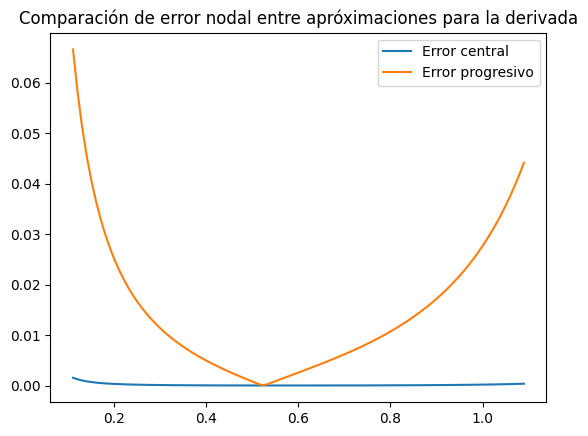

In [18]:
Error_central=np.abs(derivada_centrada - derivada_exacta)
Error_progresivo=np.abs(derivada_centrada - derivada_progresiva)
plt.plot(x_tan[1:-1],Error_central,label="Error central")
plt.plot(x_tan[1:-1],Error_progresivo,label="Error progresivo")
plt.legend()
plt.title("Comparación de error nodal entre apróximaciones para la derivada")
plt.show()

¿Tienen efectivamente el mismo orden de precisión ambos resultados? 
 No, puesto que en las gráficas comparativas se observa que la derivada progresiva posee más diferencia con la derivada exacta a diferencia de la central, por este motivo en la gráfica de error nodal se presenta con mayor precisión esta divergencia en los datos.
